In this notebook, I'll give high level intuition on convexity of cross-entropy loss and non-convexity of squared loss for Logistic regression.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def sigm(z):
    return 1./(1+np.exp(-z))

def sq_sigm(z):
    return 1./(1+np.exp(-z))**2

In [60]:
X = np.array([-1, 1])
y = np.array([0, 1])

First, let us create a simple dataset

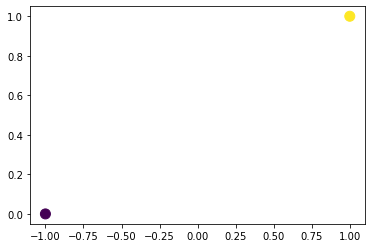

In [63]:
plt.scatter(X, y,c=y, s=100)

We will make a very simple assumption, there is no intercept term and the model is only $x\theta$

In [64]:
def y_hat(x, theta):
    return sigm(x*theta)

Let us write the squared loss and cross entropy loss functions

In [65]:
def cost_sq(X, theta):
    y_pred = y_hat(X, theta)
    y_true = y
    return (y_pred - y_true)@(y_pred - y_true)

def cost_cross(X, theta):
    y_pred = y_hat(X, theta)
    y_true = y
    return (-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)).sum()

Let us plot these two losses over theta varying from -3.2 to 3.2

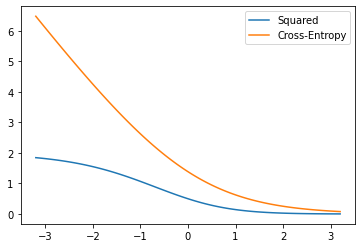

In [66]:
theta_lin = np.linspace(-3.2, 3.2, 100)
costs_square_vals = np.zeros_like(theta_lin)
costs_cross_vals = np.zeros_like(theta_lin)


for i, th in enumerate(theta_lin):
    costs_square_vals[i] = cost_sq(X, th)
    costs_cross_vals[i] = cost_cross(X, th)


plt.plot(theta_lin, costs_square_vals, label="Squared")
plt.plot(theta_lin, costs_cross_vals, label="Cross-Entropy")
plt.legend()

Let us look at the squared loss curve in more detail. Clearly, if we draw a line joining two points, some part of the curve is above and some part of the curve is below the line.

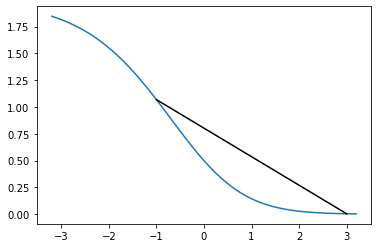

In [67]:
plt.plot(theta_lin, costs_square_vals, label="Squared")

plt.plot([-1, 3], [cost_sq(X, -1), cost_sq(X, 3)], color='k')

We can also understand the same from a formulae perspective

Let us first discuss cross-entropy loss. For our data it is:
    

$\hat{y}_0 = \frac{1}{1+e^{\theta}}$

$\hat{y}_1 = \frac{1}{1+e^{-\theta}}$



Loss_cross = $-1*\log(1-\hat{y}_0) -1*\log(\hat{y}_1) \because y_0 = 0, y_1 = 1 $

From https://www.sarthaks.com/354259/expand-log-1-e-x-in-ascending-powers-of-x-up-to-the-term-containing-x-4 we can see that $\log(1+e^{x})$ contains $x + x^2 +x^4$ like terms, thus this loss is convex 

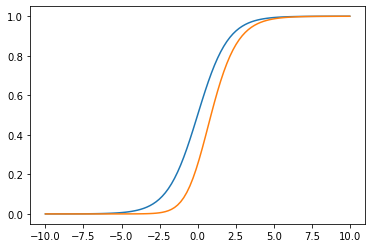

In [69]:

x2 = np.linspace(-10, 10, 100)
plt.plot(x2, sigm(x2))
plt.plot(x2, sq_sigm(x2))

